# Proyecto final. Datamining.
### Análisis tweets UEFA Champions League Final 2018

### Participantes:

Gonzalo de las Heras de Matías - Jorge de la Fuente Tagarro - Alejandro Amarillas Cámara - Sergio Sampio Balmaseda.

### Notebook (4/4). Análisis de Hashtags.

### Objetivo del notebook:

Este notebook analiza, entre otras cosas, patrones de asociación entre los hashtags usados durante la final.<br><br>

![title](Images/background.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from Library.Apriori import APriori
from wordcloud import WordCloud, STOPWORDS

In [2]:
Datos = pd.read_json("datos_limpios.json")
len(Datos)

330384

In [3]:
Datos["hora"] = pd.to_datetime(Datos["hora"])
Datos["min"] = Datos["hora"].dt.minute
Datos["hour"] = Datos["hora"].dt.hour
del Datos["hora"]

In [4]:
Datos = Datos[Datos["hour"] > 15]
len(Datos)

330323

In [5]:
Hashtags = pd.DataFrame()
Hashtags["hashtag"] = Datos["hashtag"] 
Hashtags = Hashtags[Hashtags["hashtag"] != "-1"]
Hashtags = Hashtags[Hashtags["hashtag"] != -1]
Hashtags = Hashtags.reset_index(drop=True)
Hashtags.head()

,hashtag
0,"[halamadrid, aporla13]"
1,[kuzabalit]
2,"[aporla13, halamadrid]"
3,[championsleaguefinal]
4,[championsleague]


In [6]:
len(Hashtags)

76565

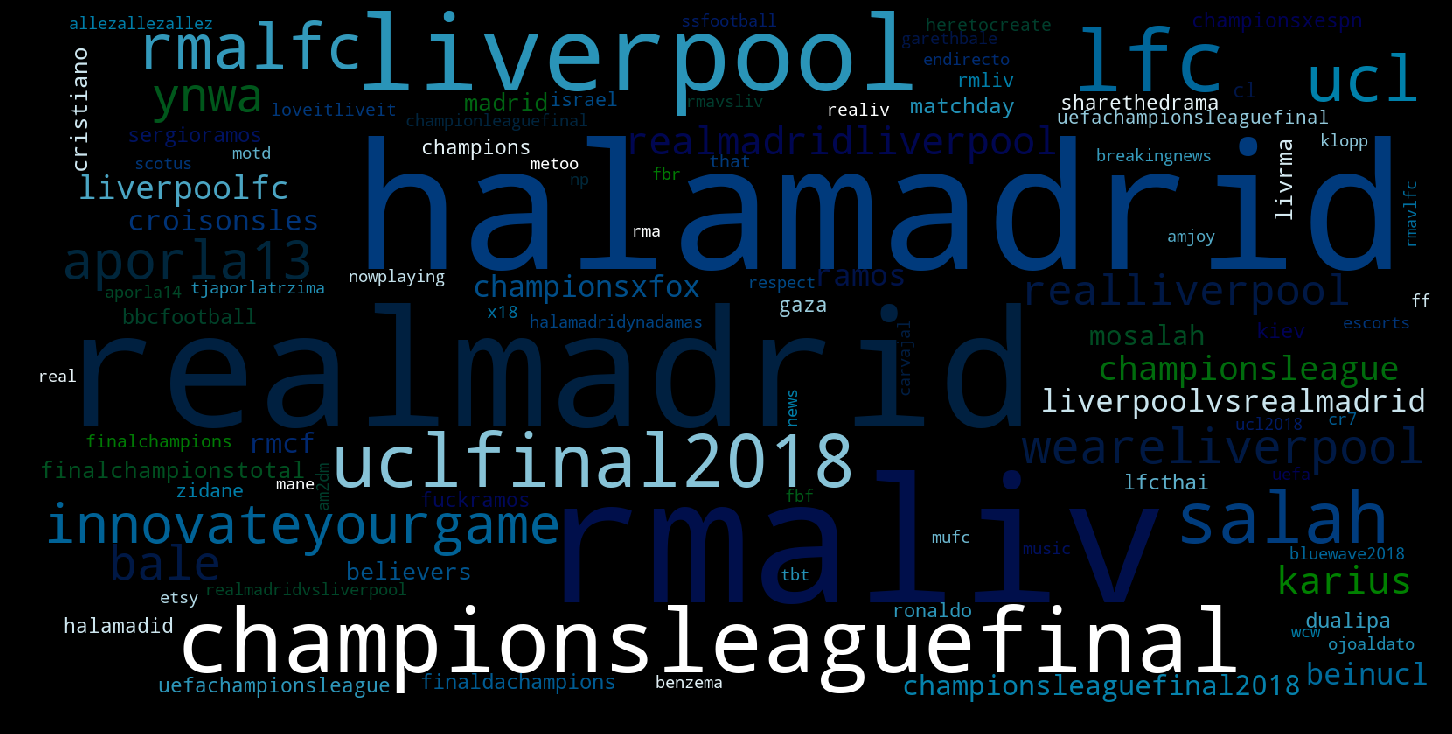

In [7]:
# split sentences to get individual words
all_words = []
for line in Hashtags["hashtag"]: # try 'tokens'
    #print(line)
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=1600,
                      height=800,
                      max_words=100,
                      max_font_size=200,
                      relative_scaling=0.5,
                      colormap="ocean",
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
Hashtags = Hashtags[:15000]

In [11]:
algoritmo_2 = APriori()
algoritmo_2.Carga(Datos=Hashtags, Columna="hashtag")
algoritmo_2.CalcularReglasDeConfianza(MinimoFreqSop=50, Confianza=50.0, Echo=True)


Iniciando algoritmo apriori para patrones de asociación...

-------

Probando k = 1

Calculando items...

Calculando Frec.Soporte...

Calculando Soporte...


,Item,Frec. Soporte,Soporte
77,[aporla13],468,0.031200
98,[bale],951,0.063400
123,[bbcfootball],84,0.005600
131,[beinucl],231,0.015400
134,[believers],83,0.005533
139,[benzema],116,0.007733
188,[bro],91,0.006067
229,[championsleague],263,0.017533
231,[championsleaguefinal],1103,0.073533
232,[championsleaguefinal2018],142,0.009467



-------

Probando k = 2
Calculando combinaciones
Calculando Frec.Soporte
Calculando Soporte
Filtrando Frec. Soporte mínimo >= 50


,Item,Frec. Soporte,Soporte
0,"[aporla13, halamadrid]",280,0.018667
1,"[aporla13, realmadrid]",81,0.005400
2,"[bale, madrid]",268,0.017867
3,"[bale, realmadrid]",51,0.003400
4,"[bbcfootball, lfc]",54,0.003600
5,"[bro, rmaliv]",91,0.006067
6,"[championsleague, klopp]",50,0.003333
7,"[championsleague, liverpool]",65,0.004333
8,"[championsleague, realmadrid]",66,0.004400
9,"[championsleaguefinal, liverpool]",126,0.008400



-------

Probando k = 3
Calculando combinaciones
Calculando Frec.Soporte
Calculando Soporte
Filtrando Frec. Soporte mínimo >= 50


,Item,Frec. Soporte,Soporte
0,"[championsleaguefinal, liverpool, realmadrid]",57,0.003800
1,"[cristiano, matchday, ucl]",69,0.004600
2,"[lfc, motd, rmaliv]",88,0.005867
3,"[liverpool, realmadrid, uclfinal2018]",57,0.003800



-------

Probando k = 4
Calculando combinaciones
Calculando Frec.Soporte
Calculando Soporte
Filtrando Frec. Soporte mínimo >= 50
Terminado

-------

Reglas de asociación: 


,r_1,r_2,soporte_r_1,soporte_r_2,confianza
0,"[cristiano, matchday]",[ucl],69,69,100.0
1,"[cristiano, ucl]",[matchday],69,69,100.0
2,[matchday],"[cristiano, ucl]",69,69,100.0
3,"[matchday, ucl]",[cristiano],69,69,100.0
4,"[motd, rmaliv]",[lfc],88,88,100.0
5,"[lfc, motd]",[rmaliv],88,91,97.0
6,[motd],"[lfc, rmaliv]",88,91,97.0
7,[cristiano],"[matchday, ucl]",69,78,88.0
8,"[realmadrid, uclfinal2018]",[liverpool],57,79,72.0
9,"[championsleaguefinal, realmadrid]",[liverpool],57,95,60.0


In [12]:
algoritmo_2.ReglasConfianza

,r_1,r_2,soporte_r_1,soporte_r_2,confianza
0,"[cristiano, matchday]",[ucl],69,69,100.0
1,"[cristiano, ucl]",[matchday],69,69,100.0
2,[matchday],"[cristiano, ucl]",69,69,100.0
3,"[matchday, ucl]",[cristiano],69,69,100.0
4,"[motd, rmaliv]",[lfc],88,88,100.0
5,"[lfc, motd]",[rmaliv],88,91,97.0
6,[motd],"[lfc, rmaliv]",88,91,97.0
7,[cristiano],"[matchday, ucl]",69,78,88.0
8,"[realmadrid, uclfinal2018]",[liverpool],57,79,72.0
9,"[championsleaguefinal, realmadrid]",[liverpool],57,95,60.0
